<a href="https://colab.research.google.com/github/Narang-Garima/Machine-Learning-Updated/blob/Projects/1_SlimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import required libraries
import pandas as pd # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt # Visualizations
%matplotlib inline

In [29]:
# load the dataset: height-weight.csv
df = pd.read_csv('height-weight.csv')

In [31]:
# display first 5 rows
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

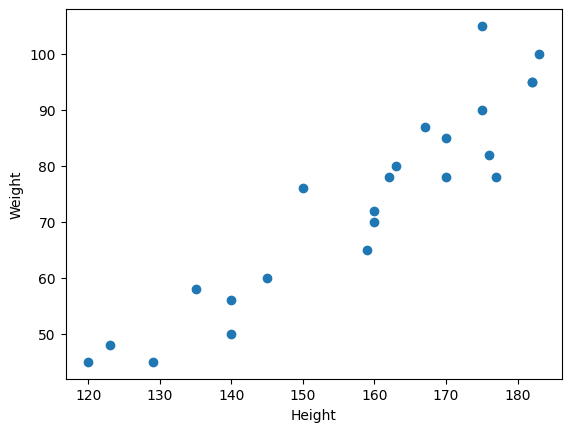

In [32]:
# to check the realtion between height and weight, scatter plot can be used
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')

In [33]:
# to get more clarity, calculate correlation between the two,
# value lies between -1 to +1, -1 means negatively correlated, 0 means no correlation, +1 means positively correlated

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


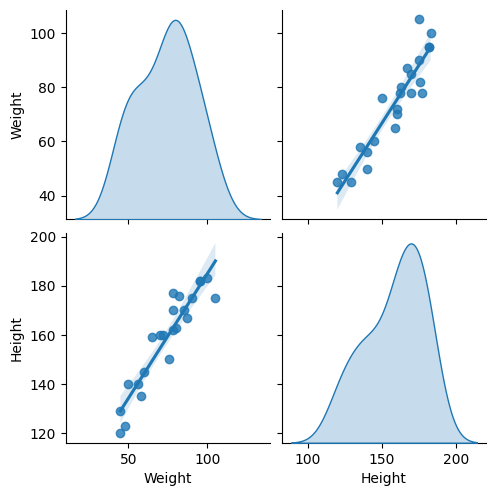

In [38]:
# To see more clarity about the distribution of the data, pair plot can be used
import seaborn as sns
sns.pairplot(df, diag_kind='kde',kind ='reg')

In [39]:
# Here Height is the dependent variable (y) and weight is the independent variable(X)
X= df[['Weight']]   #Independent/predictor -2D array/dataframe
y= df['Height']     #dependent/target- 1D array/Series


In [40]:
# Split the data into training(75%) and testing(25%) sets ( taking 3:1 ratio here)

# train_test_split() is used to divide the datasets into 2 sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)   #random_state ensure same split every time


In [41]:
# For model to perform better, scaling of the features is done so that all the feature are in similar ranges
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
sc = StandardScaler()
# Apply scaling to training data making mean=0, and variance =1
X_train = sc.fit_transform(X_train)

# Apply the same scaling to the test set, IMP: here we use transform() and not fit_transform()
# As fit computes statistics from train data, and transforms apply those parameters to scale data
# we do not apply fit to test to avoid data leakage from test data, as if we fit again, it recalculates the statistics on test data
X_test = sc.transform(X_test)


In [43]:
X_test # values will be centered around 0 with standard deviation of 1

array([[ 0.64258986],
       [ 0.47190193],
       [-1.63324922],
       [-1.00739348],
       [ 0.92706974],
       [ 0.75638181]])

In [44]:
# IMport LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# create LinearRegression model instance
lin_reg_model = LinearRegression() #if using for large datasets, use n_jobs=-1 as parameter, so as to allow all available CPU cores for faster computation



In [45]:
# Train the model with the training data, fit finds the optimal coefficient for the linear equation
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Model's learned parameters- Intercept and Slope
# Slope( or Coefficient): change in Height for a one unit change in Weight
# Intercept: the predicted Height when the Weight is zero (or average Weight when standardized)

print('Intercept:', lin_reg_model.intercept_)
print('Slope:', lin_reg_model.coef_)

Intercept: 158.0
Slope: [17.77831941]


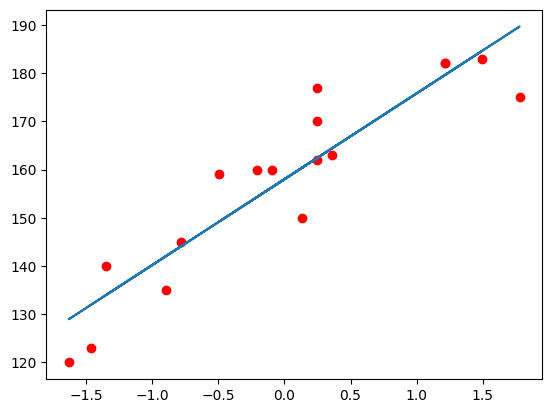

In [48]:
# Visualize the regression line along with the training data points
# The scatter points show actual data, while the line shows model predictions
# A good fit will have the line passing close to most points
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,lin_reg_model.predict(X_train))

### Prediction of test data
#### Linear Equation that we get:
height_to_predict_of_test_data = intercept + slope(weight_from_test_data)

y_pred = 158.0 + 17.78(X_test)

In [53]:
# Make predictions on the test data
# This applies our trained model to new, unseen data points
y_pred = lin_reg_model.predict(X_test)

### Evaluating Model Performance
#### Metrics used
##### 1. RMSE
##### 2. R square

In [54]:
# Import metrics to evaluate our model's performance
# These help us quantify how well our predictions match the actual values
from sklearn.metrics import mean_absolute_error,mean_squared_error

### RMSE(Root Mean Squared Error):TELLS HOW BIG THE ERROR ARE
It tells us the average error in the same units as the target variable. Lower RMSE means better predictions. It penalizes large errors more because of the squaring.
Good for comparing models when you care about the scale of errors.

Example: If predicting house prices, RMSE = 20,000 means on average your predictions are off by ~20K.
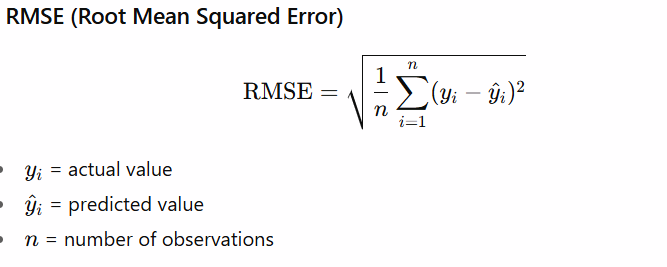

In [55]:
# Calculate different error metrics to evaluate model performance:
# MSE (Mean Squared Error): Average of squared differences (sensitive to outliers)
# MAE (Mean Absolute Error): Average of absolute differences (more robust)
# RMSE (Root Mean Squared Error): Square root of MSE (in same units as target)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

18.79109188933781
2.54638798034559
4.334869304758542


#### R square (Coefficient of Determination):how much variance is explained.
It measures how much variance in the target variable is explained by the model. It ranges from 0 to 1 (sometimes negative if the model is worse than just predicting the mean). Closer to 1 means a better fit., R² is a relative metric:

Compares your model to a baseline (mean predictor).

Example: R² = 0.85 means your model explains 85% of the variation in the target.
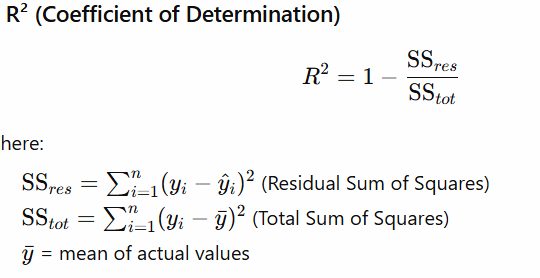

In [56]:
# import r2 score metrics
from sklearn.metrics import r2_score

# calculate score
score = r2_score(y_test,y_pred)
print(score)

0.9433292026458774


In [57]:
X_test.shape

(6, 1)

#### Other metrics used is : Adjusted R2
This penalizes adding unnecessary predictors to the model.
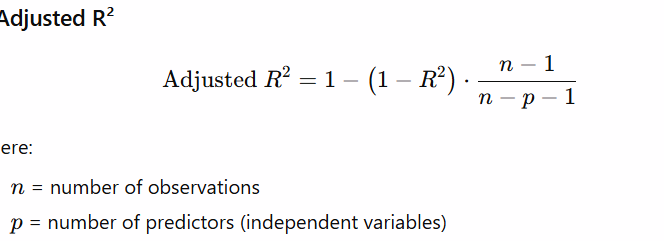




In [59]:
# Calculate using r2
adj_r2_score = 1 - ((1- score)*(len(y_test) -1))/((len(y_test))-(X_test.shape[1])-1)
adj_r2_score

0.9291615033073467

## More detailed Statistical Modeling

---


In [60]:
# statsmodel can provide more statistical details beyond scikit-learn, It has OLS regression model
import statsmodels.api as sm

In [61]:
# Create and train an Ordinary Least Squares (OLS) regression model
# OLS is the traditional method used in linear regression
# Note: statsmodels doesn't automatically add an intercept, but our data is standardized
model=sm.OLS(y_train,X_train).fit()

In [62]:
# Make predictions using the statsmodels OLS model
# Compare these with the scikit-learn model predictions to verify consistency
prediction=model.predict(X_test)
print(prediction)

[ 11.42416775   8.38962319 -29.03642636 -17.90976298  16.48174201
  13.44719746]


In [63]:
# Display a comprehensive statistical summary of the OLS model
# This shows important details like:
# - Coefficient p-values (statistical significance)
# - Standard errors
# - R-squared and Adjusted R-squared
# - F-statistic (overall model significance)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2021
Date:                Wed, 01 Oct 2025   Prob (F-statistic):                       0.659
Time:                        01:57:55   Log-Likelihood:                         -110.21
No. Observations:                  17   AIC:                                      222.4
Df Residuals:                      16   BIC:                                      223.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:

# Use our trained model to predict the height for a new weight value (72)
# First transform the new data point using the same scaler used on training data
# This demonstrates how to use the model for real predictions on new data
lin_reg_model.predict(sc.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.27447466])

## When to Use Simple Linear Regression:

### Used when there are 2 variables involved and one affects the other and is expected to form a linear relationship

### In short:
You want to see how one thing affects another.

**Example:**  
Does the number of hours you study affect your exam score?  
- There are only two variables involved.  
- One is the **cause** (independent variable → hours studied).  
- One is the **effect** (dependent variable → exam score).  
- You expect a straight-line relationship.  

If you put the data on a graph, the points roughly form a line (not a curve).  

---

✅ **Good examples where it makes sense:**  
- Predicting height from age (for kids).  
- Predicting car fuel use from distance traveled.  
- Predicting house price from its size.  

❌ **Not good to use if:**  
- The relationship is curved or complicated.  
- Many factors affect the outcome (then you’d use multiple regression instead).  
